# Here's an explanation of the code:

Importing Libraries: The code starts by importing essential libraries:

numpy for numerical operations.
pandas for handling and analyzing data.
train_test_split from sklearn to split data into training and testing sets.
tensorflow.keras for building and training the recommendation model.
Defining Static Data: It sets up static datasets:

movies_data: Contains movie IDs and titles.
users_data: Contains user IDs and usernames.
interactions_data: Represents interactions between users and movies with ratings.
Creating DataFrames: The static data is converted into DataFrames (movies_df, users_df, ratings_df) for easy manipulation and analysis.

Splitting Data: The ratings_df is split into training and test datasets, with 20% of the data used for testing. This helps in evaluating the performance of the recommendation model.

Creating Mappings: It creates mappings for user and item IDs to integer indices. This mapping is necessary for converting user and item IDs into a format suitable for the model.

Mapping IDs to Indices: The code maps user and item IDs in both training and test datasets to their respective integer indices using the created mappings.

Defining the Model: The recommendation system is built using a matrix factorization approach:

Defines the number of unique users and items and the size of embedding vectors.
Sets up input layers for user and item IDs.
Embeds these IDs into dense vectors and computes the dot product of these vectors to predict ratings.
Compiling the Model: The model is compiled with the Adam optimizer and Mean Squared Error loss function. This setup is used for training the model.

Preparing and Training Data: Prepares the training data and fits the model. It trains the model on user-item interactions to predict ratings.

Evaluating the Model: The model is evaluated on test data to determine its performance, specifically its loss.

Predicting Ratings: The model is used to predict ratings for a specific user-item pair, demonstrating how the model can be used for recommendations.

Discussion on Scalability and Cold-Start Problems:

Scalability: As the number of users and items grows, the model becomes more complex and computationally expensive. Techniques like matrix decomposition can help manage this.
Cold-Start Problem: The model struggles with new users or items with no historical data. Solutions include using hybrid models or content-based filtering to address this issue.

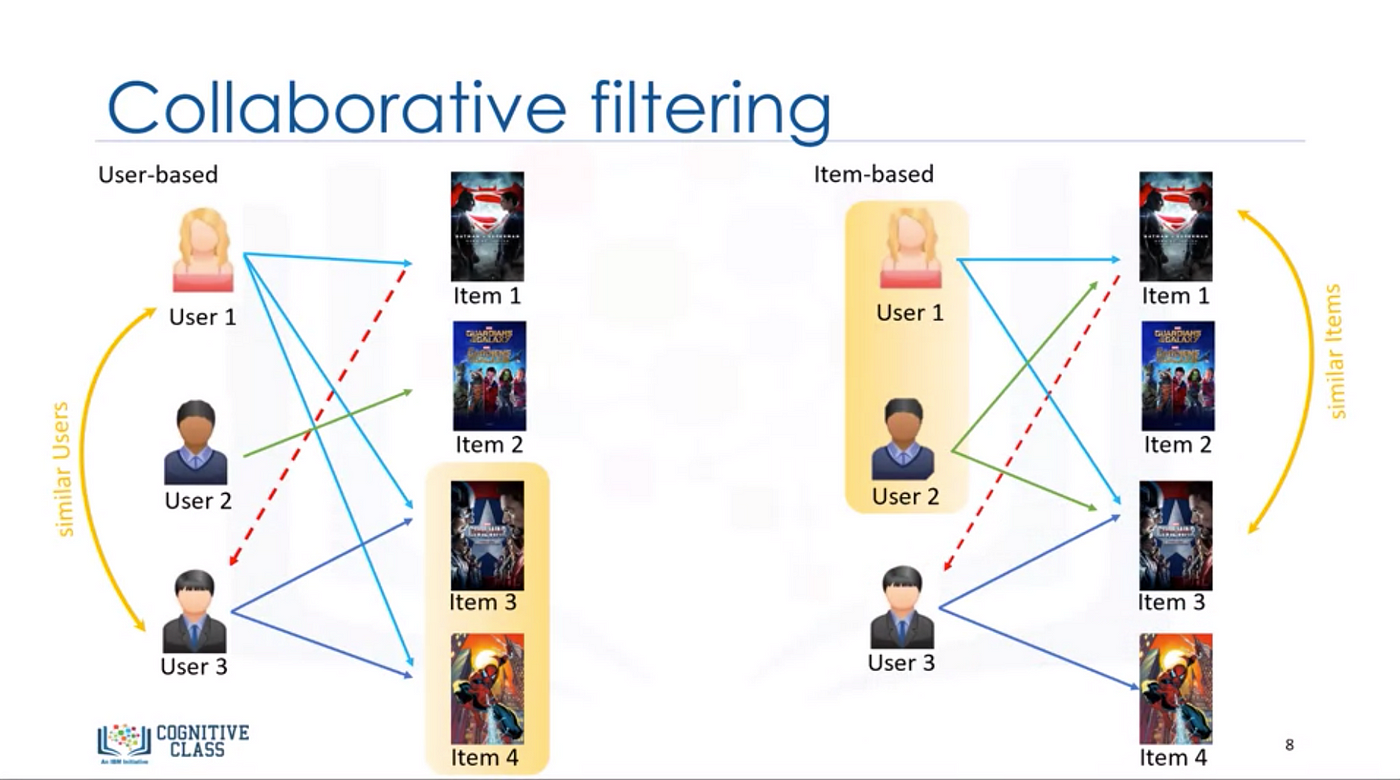

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Dot
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError

# Define static movie and user data
movies_data = {
    'movieId': [1, 2, 3, 4, 5],
    'title': ['Movie A', 'Movie B', 'Movie C', 'Movie D', 'Movie E']
}

users_data = {
    'userId': [1, 2, 3, 4, 5],
    'username': ['User1', 'User2', 'User3', 'User4', 'User5']
}

# Define interactions between users and movies
interactions_data = {
    'userId': [1, 1, 2, 2, 3, 4, 4, 5],
    'movieId': [1, 2, 2, 3, 3, 4, 5, 5],
    'rating': [5, 3, 4, 2, 5, 1, 2, 5]
}

# Create DataFrames
movies_df = pd.DataFrame(movies_data)
users_df = pd.DataFrame(users_data)
ratings_df = pd.DataFrame(interactions_data)

# Display the data
print("Movies Data:")
print(movies_df)
print("\nUsers Data:")
print(users_df)
print("\nRatings Data:")
print(ratings_df)

# Split data into training and test sets
train_data, test_data = train_test_split(ratings_df, test_size=0.2, random_state=42)

# Create user and item mappings
user_mapping = {user: i for i, user in enumerate(users_df['userId'].unique())}
item_mapping = {item: i for i, item in enumerate(movies_df['movieId'].unique())}

# Map user and item IDs to integer indices
train_data['user'] = train_data['userId'].map(user_mapping)
train_data['item'] = train_data['movieId'].map(item_mapping)
test_data['user'] = test_data['userId'].map(user_mapping)
test_data['item'] = test_data['movieId'].map(item_mapping)

# Define the model
num_users = len(user_mapping)
num_items = len(item_mapping)
embedding_dim = 50

user_input = Input(shape=[1])
item_input = Input(shape=[1])

user_embedding = Embedding(
item_embedding = Embedding(num_items, embedding_dim)(num_users, embedding_dim)(user_input)item_input)

user_vecs = Flatten()(user_embedding)
item_vecs = Flatten()(item_embedding)

dot_product = Dot(axes=1)([user_vecs, item_vecs])
model = Model([user_input, item_input], dot_product)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss=MeanSquaredError())

# Prepare data for training
train_user_data = train_data['user'].values
train_item_data = train_data['item'].values
train_ratings = train_data['rating'].values

# Train the model
model.fit([train_user_data, train_item_data], train_ratings, epochs=10, batch_size=64, verbose=1)

# Prepare test data for evaluation
test_user_data = test_data['user'].values
test_item_data = test_data['item'].values
test_ratings = test_data['rating'].values

# Evaluate the model
loss = model.evaluate([test_user_data, test_item_data], test_ratings)
print(f'Test Loss: {loss}')

# Predict ratings for a sample user-item pair
sample_user = 1
sample_item = 1
predicted_rating = model.predict([np.array([user_mapping[sample_user]]), np.array([item_mapping[sample_item]])])
print(f'Predicted Rating for User {sample_user} on Item {sample_item}: {predicted_rating[0][0]}')

# Discuss scalability and cold-start problems
print("\nScalability and Cold-Start Problems Discussion:")
print("- Scalability: As the number of users and items increases, the model size and computation time increase. Techniques like matrix decomposition and distributed computing can help.")
print("- Cold-Start Problem: The model struggles with new users or items with no historical data. Solutions include hybrid models and content-based filtering to alleviate this issue.")

Movies Data:
   movieId    title
0        1  Movie A
1        2  Movie B
2        3  Movie C
3        4  Movie D
4        5  Movie E

Users Data:
   userId username
0       1    User1
1       2    User2
2       3    User3
3       4    User4
4       5    User5

Ratings Data:
   userId  movieId  rating
0       1        1       5
1       1        2       3
2       2        2       4
3       2        3       2
4       3        3       5
5       4        4       1
6       4        5       2
7       5        5       5
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 18s 18s/step - loss: 16.5135
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 698ms/step - loss: 16.3423
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step - loss: 16.1623
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 240ms/step - loss: 15.9503
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - loss: 15.6911
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - loss: 15.3755
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step - loss: 14.9978
Epoch 8/10
1/1 ━━━━━━